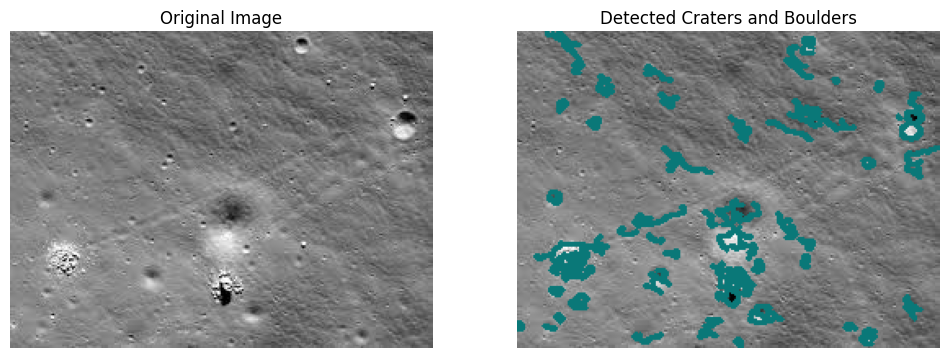

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read the local image file
def read_local_image(file_path):
    image = cv2.imread(file_path)
    return image

# Path to the local OHRC image file
local_image_path = 'test3.jpg'  # Replace with your actual image file name

# Read the image
image = read_local_image(local_image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (120, 120, 10), 2)

# Display the original and the output images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Craters and Boulders')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


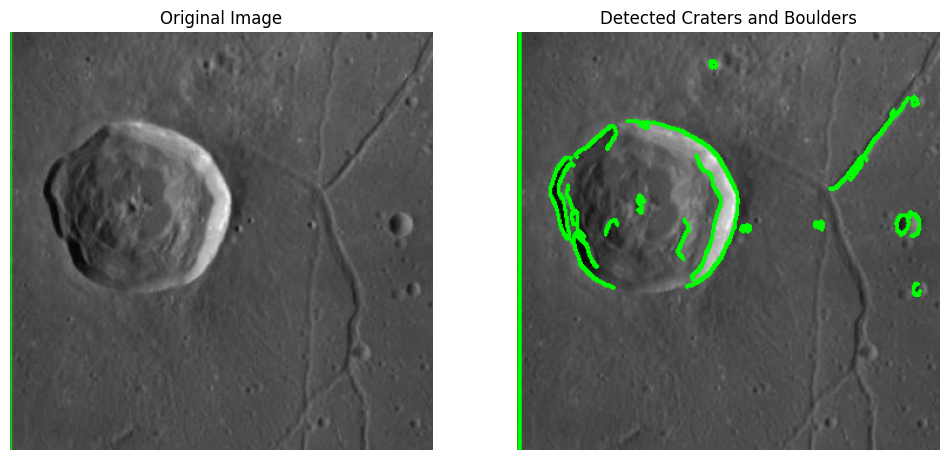

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read the local image file
def read_local_image(file_path):
    image = cv2.imread(file_path)
    return image

# Path to the local OHRC image file
local_image_path = 'tempSS.png'  # Replace with your actual image file name

# Read the image
image = read_local_image(local_image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Separate boulders and craters based on contour area
boulders = []
craters = []

for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100:  # Threshold for boulders (you may need to adjust this)
        boulders.append(contour)
    else:
        craters.append(contour)

# Draw contours on the original image
output_image = image.copy()
cv2.drawContours(output_image, boulders, -1, (0, 255, 0), 2)  # Green for boulders
cv2.drawContours(output_image, craters, -1, (255, 0, 0), 2)   # Red for craters

# Display the original and the output images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Craters and Boulders')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


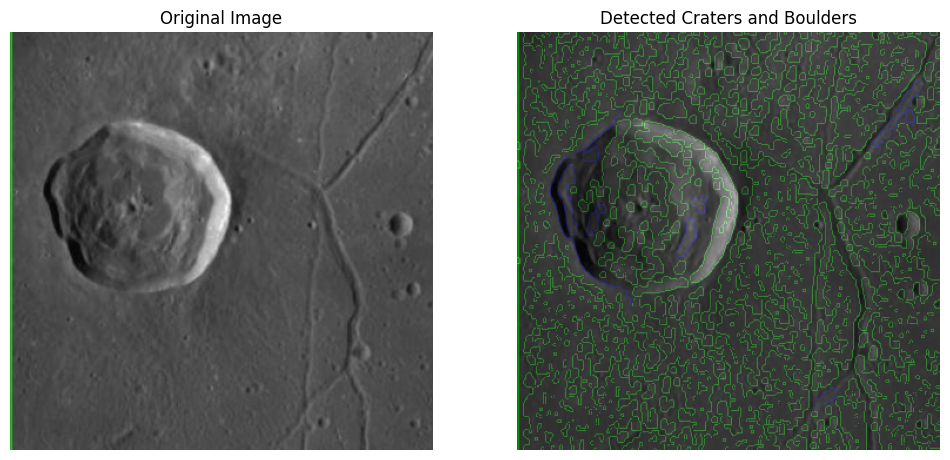

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read the local image file
def read_local_image(file_path):
    image = cv2.imread(file_path)
    return image

# Path to the local OHRC image file
local_image_path = 'tempSS.png'  # Replace with your actual image file name

# Read the image
image = read_local_image(local_image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve contour detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to get a binary image
thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological operations to close gaps in contours
kernel = np.ones((3, 3), np.uint8)
morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel, iterations=2)

# Use Canny edge detection
edges = cv2.Canny(morphed, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Separate boulders and craters based on contour area
boulders = []
craters = []

for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100:  # Threshold for boulders (you may need to adjust this)
        boulders.append(contour)
    else:
        craters.append(contour)

# Create a mask for coloring
mask = np.zeros_like(image)

# Fill the contours on the mask with different colors
cv2.drawContours(mask, boulders, -1, (0, 255, 0), thickness=cv2.FILLED)  # Green for boulders
cv2.drawContours(mask, craters, -1, (255, 0, 0), thickness=cv2.FILLED)   # Red for craters

# Combine the original image with the mask
output_image = cv2.addWeighted(image, 0.7, mask, 0.3, 0)

# Display the original and the output images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Craters and Boulders')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


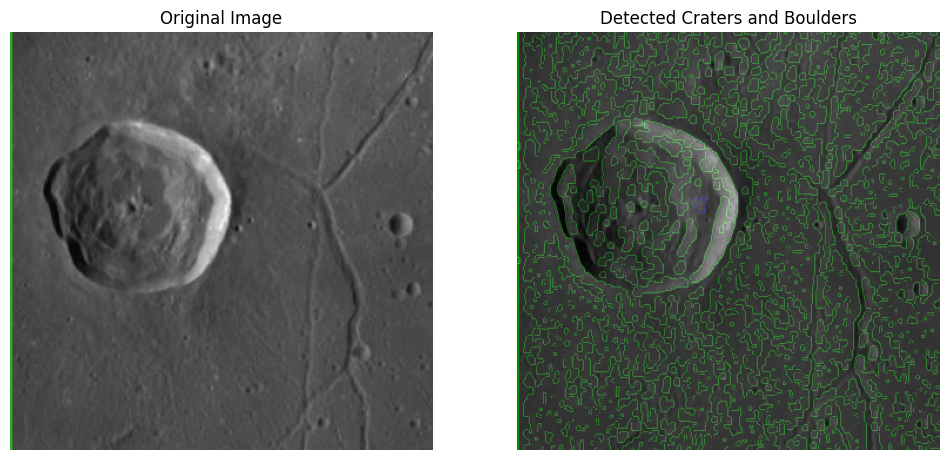